###### Bulgaria Employment Trends 
[Go back to the main page](./../Bulgaria_Employment_Trends.ipynb)

---------

## Offers Over Time

-------
### Introduction

- Objectives: 
 - Provide graphs showing the number of offers submitted over time in multiple aggregation levels: day, week, month.
 - Provide a Jupyter Workbook Widget to switch between the aggregation levels.
 

### Methodology

Notes:
- Views are defined for each aggregation level
- 

### Prototyping

Using `matplotlib` to prepare the necessary data and confirm it is suitable for plotting.

In [1]:
import datetime
import psycopg2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import ipywidgets as widgets

from nbstyler import STYLE

%matplotlib notebook
%matplotlib inline

In [2]:
conn = psycopg2.connect("dbname=jobsbg")
ads_daily = pd.read_sql_query('SELECT * FROM v_offers_count_daily', conn, index_col='subm_date')
ads_weekly = pd.read_sql_query('SELECT * FROM v_offers_count_weekly', conn, index_col='week_ts')
ads_monthly = pd.read_sql_query('SELECT * FROM v_offers_count_monthly', conn, index_col='month_ts')

ads_daily = ads_daily[1:-1]
ads_weekly = ads_weekly[1:-1]
ads_monthly = ads_monthly[1:-1]

ads_daily.index = pd.to_datetime(ads_daily.index)  # convert the DataFrame index to DatetimeIndex object
ads_weekly.index = pd.to_datetime(ads_weekly.index)
ads_monthly.index = pd.to_datetime(ads_monthly.index)

In [3]:
ads_daily.head(1), ads_weekly.head(1), ads_monthly.head(1)

(            subm_count
 subm_date             
 2018-12-17        1516,             subm_count
 week_ts               
 2018-12-10        6756,             subm_count
 month_ts              
 2018-11-01       36483)

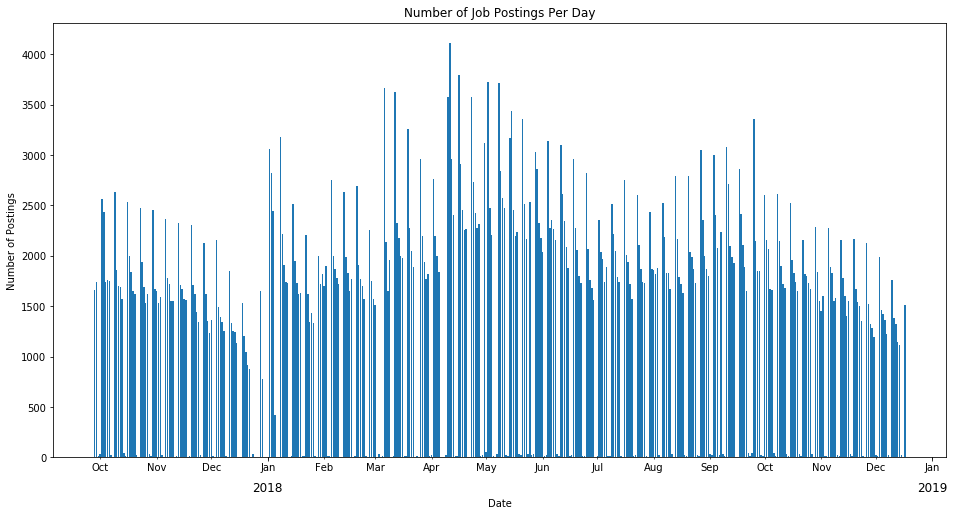

In [4]:
fig = plt.figure(num = 0, figsize = (16, 8))
jobs_per_day_barchart = fig.add_subplot(1, 1, 1)

# BARS
num_jobs_bars = jobs_per_day_barchart.bar(ads_daily.index, ads_daily.subm_count, align = 'center')

# TITLE
jobs_per_day_barchart.set_title('Number of Job Postings Per Day')

# AXIS LABELS
jobs_per_day_barchart.set_xlabel('Date')
jobs_per_day_barchart.set_ylabel('Number of Postings')

# AXIS TICKS
jobs_per_day_barchart.set_yticks((0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000))
jobs_per_day_barchart.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
jobs_per_day_barchart.xaxis.set_major_locator(mdates.YearLocator())

# Show every month in xlabels
jobs_per_day_barchart.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
jobs_per_day_barchart.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday = 1))

for label in jobs_per_day_barchart.xaxis.get_majorticklabels():
    label.set_rotation(0)
    label.set_y(-0.04)
    label.set_size(12)
    label.set_ha('center')

for label in jobs_per_day_barchart.xaxis.get_minorticklabels():
    label.set_rotation(0)

plt.show()

### Implementing the Chart in Plotly

In [5]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline

In [6]:
period_start = ads_daily.index.min()
period_end = ads_daily.index.max()
full_time_period = pd.date_range(period_start, period_end)

In [14]:
daily_bar = go.Bar(
    x = [date + datetime.timedelta(hours=12) for date in ads_daily.index],
    y = [value for value in ads_daily.subm_count],
    hoverinfo = 'x+y',
    showlegend = False,
    marker = dict(
        line = dict(width = 0),
        color = STYLE['colors']['solid']['acc1']
    ),
)

weekly_bar = go.Bar(
    x = [week for week in ads_weekly.index],
    y = [value for value in ads_weekly.subm_count],
    hoverinfo = 'x+y',
    showlegend = False,
    marker = dict(
        line = dict(width = 0),
        color = STYLE['colors']['solid']['acc1']
    ),
    visible = False,
)

monthly_bar = go.Bar(
    x = [month for month in ads_monthly.index],
    y = [value for value in ads_monthly.subm_count],
    hoverinfo = 'x+y',
    showlegend = False,
    marker = dict(
        line = dict(width = 0),
        color = STYLE['colors']['solid']['acc1']
    ),
    visible = False,
)

data = [daily_bar, weekly_bar, monthly_bar]

Plotly buttons and defined interactions to make the chart interactive

In [29]:
updatemenus = list([
    dict(
        type='buttons',
        direction='right',
        xanchor = 'center',
        x = 0.5,
        yanchor = 'top',
        y = 1.08,
        active=-1,
        buttons=list([
            dict(
                label = 'Daily',
                method = 'update',
                args = [
                    {'visible': [True, False, False]},
                    {'title': 'Daily Job Offer Submissions'},
                ]),
            dict(
                label = 'Weekly',
                method = 'update',
                args = [
                    {'visible': [False, True, False]},
                    {'title': 'Weekly Job Offer Submissions'},
                ]),
            dict(
                label = 'Monthly',
                method = 'update',
                args = [
                    {'visible': [False, False, True]},
                    {'title': 'Monthly Job Offer Submissions'},
                ]),
        ]),
    )
])

In [35]:
layout = go.Layout(
    paper_bgcolor = STYLE['colors']['solid']['bg1'],            
    plot_bgcolor = STYLE['colors']['solid']['bg1'],
    font = dict(
        color = STYLE['colors']['solid']['fg2'],
        family = STYLE['fonts']['default']['family'],
        size = STYLE['fonts']['default']['size'],
    ),
    title = 'Job Ad Submissions per Day',
    titlefont = dict(
        color = STYLE['colors']['solid']['fg2'],
        family = STYLE['fonts']['titlefont']['family'],
        size = STYLE['fonts']['titlefont']['size'],
    ),
    xaxis = dict(
        title = 'Week no',
        type = 'date',
        fixedrange = True,
        hoverformat = '',
        ticks = 'outside',
        tickmode = 'auto',
    ),
    yaxis = dict(
        title = 'Number of submissions',
        fixedrange = True,
        hoverformat = '{:,}',
        tickformat = '{:,}',
        ticks = 'outside',
        tickwidth = 1,
    ),
    updatemenus=updatemenus,
)

In [36]:
fig = go.Figure(data = data, layout = layout)

plotly.offline.iplot(fig, filename = 'offers_over_time.html')

# Uncomment the line below to export an HTML version of the chart.
# plotly.offline.plot(fig, filename = 'offers_over_time-daily_result.html')

'file:///data/WORKSPACE/jpynb_Employment_Trends_Bulgaria/workbooks/offers_over_time-daily_result.html'

In [1]:
from IPython.core.display import HTML
with open('../resources/styles/datum.css', 'r') as f:
    style = f.read()
HTML(style)